<a href="https://colab.research.google.com/github/RJAbuNasser/Final-Project/blob/main/final_project_2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split


# **Load the Dataset**

In [102]:
df=pd.read_csv('/content/HeartDiseaseTrain-Test.csv')

In [103]:
df.shape

(1025, 14)

In [104]:
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


# **Exploratory Data Analysis (EDA)**

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [106]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [107]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [108]:
df.isnull().sum()


,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [109]:
categ_df=df[['sex', 'chest_pain_type','fasting_blood_sugar', 'rest_ecg', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia']]

In [110]:
for i in categ_df:
  print(i)
  print(df[i].unique())

sex
['Male' 'Female']
chest_pain_type
['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
fasting_blood_sugar
['Lower than 120 mg/ml' 'Greater than 120 mg/ml']
rest_ecg
['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']
slope
['Downsloping' 'Upsloping' 'Flat']
vessels_colored_by_flourosopy
['Two' 'Zero' 'One' 'Three' 'Four']
thalassemia
['Reversable Defect' 'Fixed Defect' 'Normal' 'No']


# **preprocessing**

## Encode categorical columns

In [111]:
label_encoders ={}
for col in categ_df:
  l_encoder= LabelEncoder()
  df[col] = l_encoder.fit_transform(df[col])
  label_encoders[col] =l_encoder

In [112]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,No,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,Yes,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,Yes,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,No,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,No,1.9,1,2,0,0


##Standardize continuous variables

In [113]:
'''
scaler = MinMaxScaler()
cont_df = ['age','resting_blood_pressure', 'cholestoral', 'Max_heart_rate','oldpeak']
df[cont_df] = scaler.fit_transform(df[cont_df])
cont_df
'''
scaler = StandardScaler()
cont_df = ['age','resting_blood_pressure', 'cholestoral', 'Max_heart_rate','oldpeak']
df[cont_df] = scaler.fit_transform(df[cont_df])


In [114]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,-0.268437,1,3,-0.377636,-0.659332,1,2,0.821321,No,-0.060888,0,3,3,0
1,-0.158157,1,3,0.479107,-0.833861,0,1,0.255968,Yes,1.727137,2,4,3,0
2,1.716595,1,3,0.764688,-1.396233,1,2,-1.048692,Yes,1.301417,2,4,3,0
3,0.724079,1,3,0.936037,-0.833861,1,2,0.516900,No,-0.912329,0,1,3,0
4,0.834359,0,3,0.364875,0.930822,0,2,-1.874977,No,0.705408,1,2,0,0


#**PCA**

In [116]:
non_numerical_cols = df.select_dtypes(exclude=np.number).columns
df_numerical = df.drop(columns=non_numerical_cols)

In [117]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(df_numerical )


In [118]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_numerical)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()


,principal component 1,principal component 2
0,0.801391,1.085650
1,1.741503,2.202935
2,2.449254,1.525423
3,1.775367,-0.808172
4,1.037832,-1.923011


In [119]:
variance = pca.explained_variance_ratio_
print(f'Explained variance by components: {variance}')


Explained variance by components: [0.29283897 0.14691708]


K-means

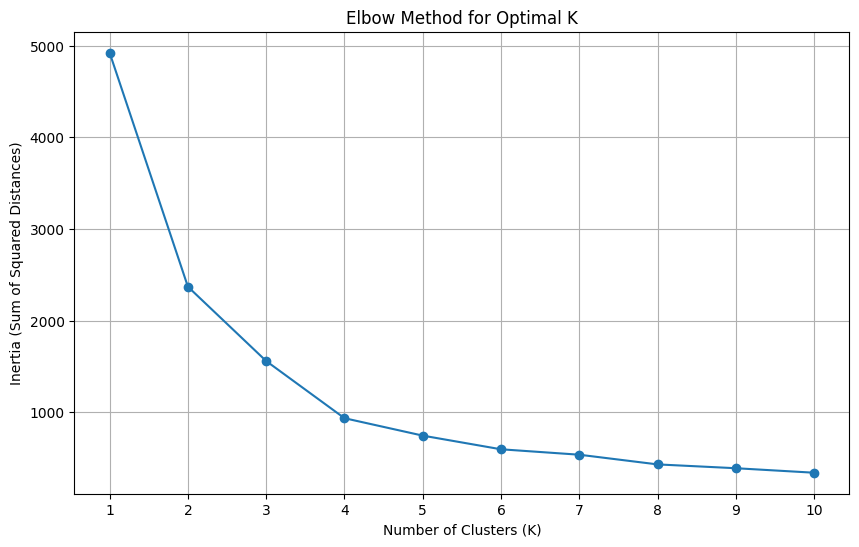

In [120]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca )
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid()
plt.show()

In [121]:

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(features_pca)

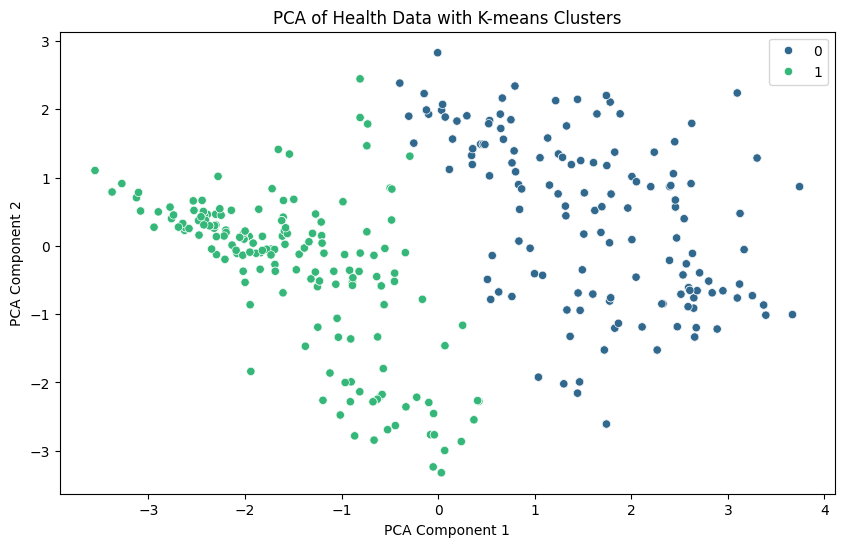

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters, palette='viridis')
plt.title('PCA of Health Data with K-means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

##  Anomaly Detection

Detection using Isolation Forest

In [123]:
iso_forest = IsolationForest(contamination=0.1)
outlier_predictions = iso_forest.fit_predict(df[cont_df])
outliers = np.where(outlier_predictions == -1)

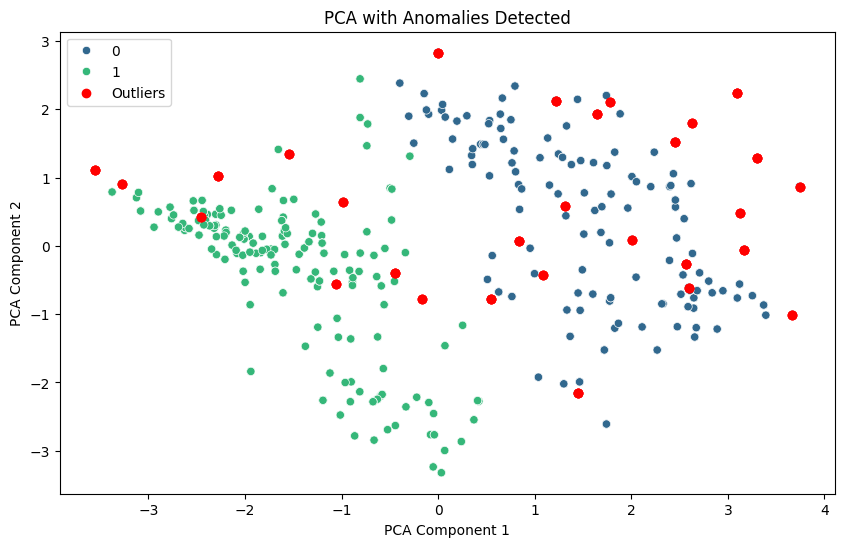

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters, palette='viridis')
plt.scatter(features_pca[outliers, 0], features_pca[outliers, 1], color='red', label='Outliers')
plt.title('PCA with Anomalies Detected')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [125]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("Number of outliers detected:", len(outliers[0]))

Cluster Centers:
[[ 1.60167246  0.42054477]
 [-1.45552358 -0.38217104]]
Number of outliers detected: 101


#**Time series**

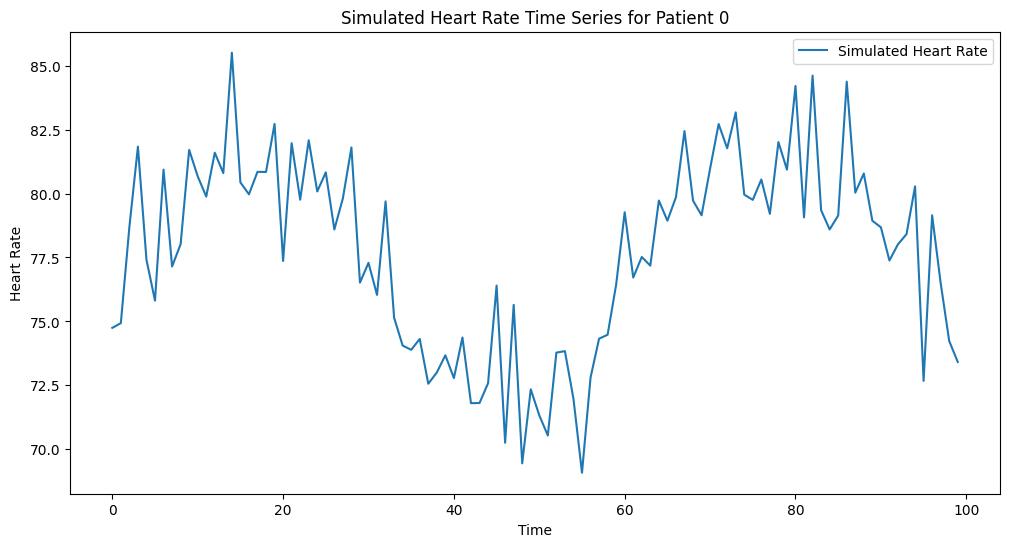

In [126]:
np.random.seed(42)
n_patients = 50
n_time_points = 100
time = np.arange(n_time_points)
patient_ids = np.repeat(np.arange(n_patients), n_time_points)
time_repeated = np.tile(time, n_patients)  # Repeating arrays

ages = np.random.randint(30, 80, size=n_patients)
sexes = np.random.randint(0, 2, size=n_patients)
chest_pain_types = np.random.randint(1, 5, size=n_patients)
resting_bps = np.random.randint(90, 200, size=n_patients)
cholesterols = np.random.randint(150, 300, size=n_patients)
fasting_bs = np.random.randint(0, 2, size=n_patients)
thalass = np.random.randint(70, 200, size=n_patients)
exercise_anginas = np.random.randint(0, 2, size=n_patients)


ages_repeated = np.repeat(ages, n_time_points)
sexes_repeated = np.repeat(sexes, n_time_points)
chest_pain_types_repeated = np.repeat(chest_pain_types, n_time_points)
resting_bps_repeated = np.repeat(resting_bps, n_time_points)
cholesterols_repeated = np.repeat(cholesterols, n_time_points)
fasting_bs_repeated = np.repeat(fasting_bs, n_time_points)
thalass_repeated = np.repeat(thalass, n_time_points)
exercise_anginas_repeated = np.repeat(exercise_anginas, n_time_points)


df = pd.DataFrame({
    'Patient_ID': patient_ids,
    'Time': time_repeated,
    'Age': ages_repeated,
    'Sex': sexes_repeated,
    'Chest_Pain_Type': chest_pain_types_repeated,
    'Resting_BP': resting_bps_repeated,
    'Cholesterol': cholesterols_repeated,
    'Fasting_BS': fasting_bs_repeated,
    'Thalass': thalass_repeated,
    'Exercise_Angina': exercise_anginas_repeated,
})


df['Heart_Rate'] = (70 +  5 * np.sin(0.1 * df['Time'] + df['Patient_ID']) +   0.1 * df['Age'] +
    np.random.normal(0, 2, size=len(df)))


sample_patient_id = 0
sample_data = df[df['Patient_ID'] == sample_patient_id]

plt.figure(figsize=(12, 6))
plt.plot(sample_data['Time'], sample_data['Heart_Rate'], label='Simulated Heart Rate')
plt.title(f'Simulated Heart Rate Time Series for Patient {sample_patient_id}')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

## preperation of the data

In [127]:
df['Heart_Rate_Lag1'] = df.groupby('Patient_ID')['Heart_Rate'].shift(1)
df['Heart_Rate_Lag2'] = df.groupby('Patient_ID')['Heart_Rate'].shift(2)
df.dropna(inplace=True)

In [129]:
features = df[['Age', 'Sex', 'Chest_Pain_Type', 'Resting_BP',
                'Cholesterol', 'Fasting_BS', 'Thalass',
                'Exercise_Angina', 'Heart_Rate', 'Heart_Rate_Lag1', 'Heart_Rate_Lag2']]

## PCA

In [130]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


k_means

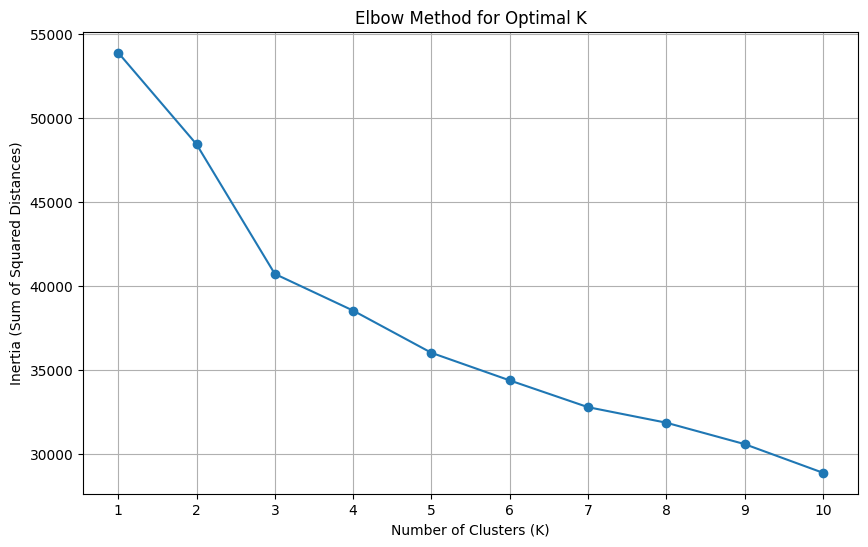

In [131]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid()
plt.show()

In [132]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_result)

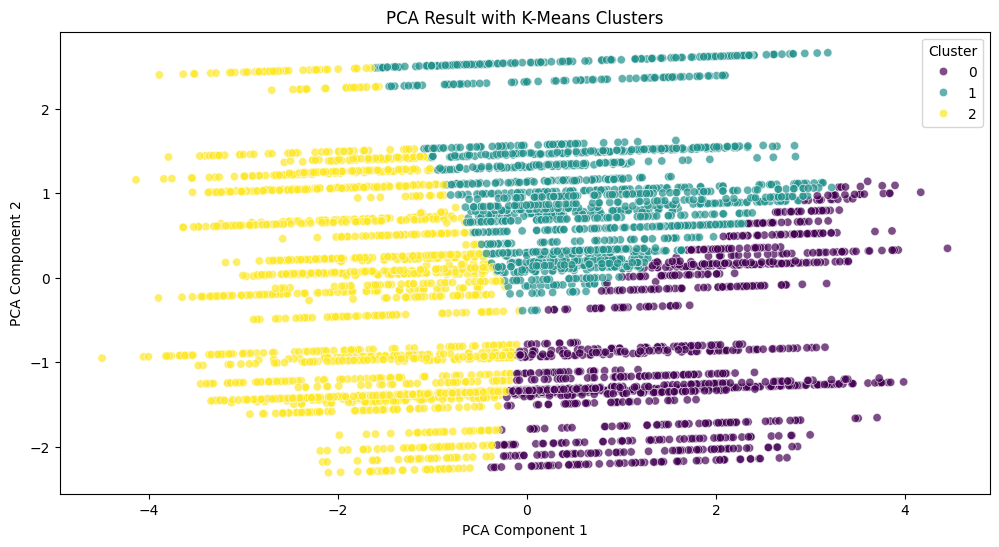

In [133]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('PCA Result with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [135]:
from typing import AnyStr
iso_forest_time = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = iso_forest_time.fit_predict(scaled_features)
Anomaly = np.where(df['Anomaly'] == -1)

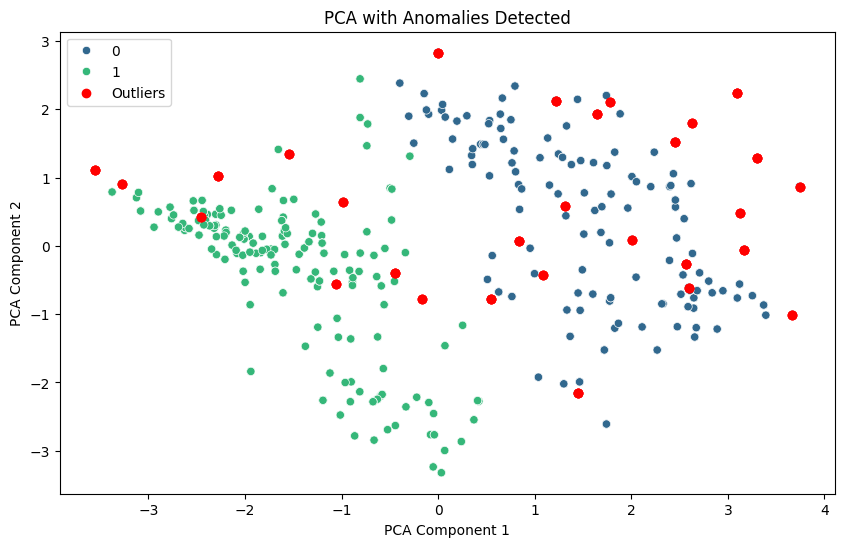

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters, palette='viridis')
plt.scatter(features_pca[outliers, 0], features_pca[outliers, 1], color='red', label='Outliers')
plt.title('PCA with Anomalies Detected')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [137]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("Number of outliers detected:", len(Anomaly[0]))

Cluster Centers:
[[ 1.58092655 -0.89609322]
 [ 0.66791297  1.03553414]
 [-1.66945075 -0.22643046]]
Number of outliers detected: 490
